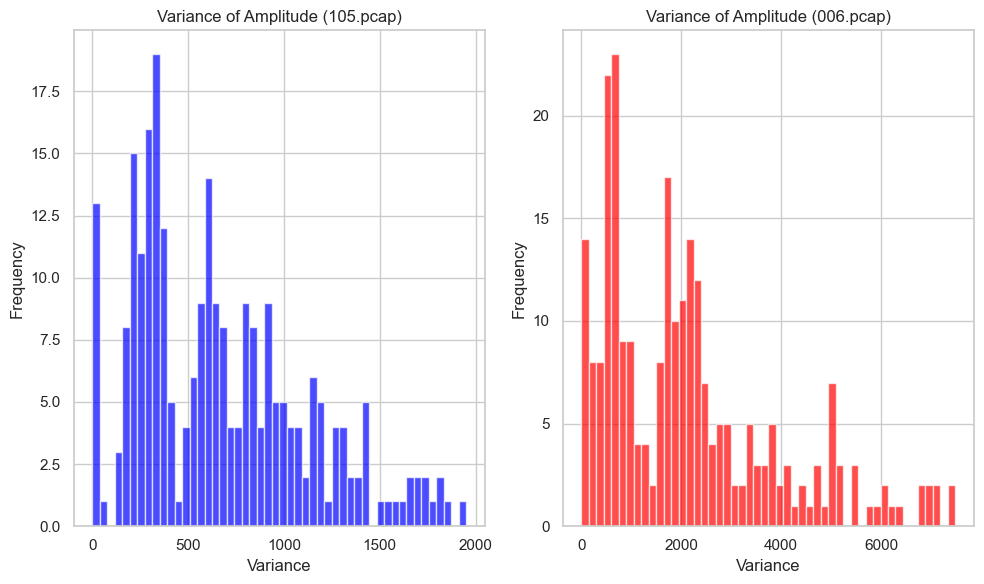

In [ ]:
from nexcsi import decoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

# デバイス設定
device = 'raspberrypi'

def gauss(amplitude, sigma=1.0):
    return gaussian_filter1d(amplitude, sigma=sigma)

# 最初のpcapファイルの読み込みと処理
samples_1 = decoder(device).read_pcap('pcaps/008.pcap')
csi_data_1 = decoder(device).unpack(samples_1['csi'])

# 2つ目のpcapファイルの読み込みと処理
samples_2 = decoder(device).read_pcap('pcaps/201.pcap')
csi_data_2 = decoder(device).unpack(samples_2['csi'])

# CSIデータの振幅（Amplitude）の取得
amplitude_1 = gauss(np.abs(csi_data_1))
amplitude_2 = gauss(np.abs(csi_data_2))


# 分散を計算する関数
def calculate_variance(csi_data):
    """
    CSIデータから振幅の分散を計算
    """
    return np.var(csi_data, axis=0)

# 分散の計算
variance_1 = calculate_variance(amplitude_1)
variance_2 = calculate_variance(amplitude_2)

# 分散のヒストグラム表示
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# pcap 105の分散のヒストグラム
plt.subplot(1, 2, 1)
plt.hist(variance_1, bins=50, color='blue', alpha=0.7)
plt.title('Variance of Amplitude (105.pcap)')
plt.xlabel('Variance')
plt.ylabel('Frequency')

# pcap 006の分散のヒストグラム
plt.subplot(1, 2, 2)
plt.hist(variance_2, bins=50, color='red', alpha=0.7)
plt.title('Variance of Amplitude (006.pcap)')
plt.xlabel('Variance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
